<a href="https://colab.research.google.com/github/YusufAlperGulden/Sonicthehedgedog/blob/main/rfdetr34%20ile%20rfdetr101%20modelleri%20kar%C5%9F%C4%B1la%C5%9Ft%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jun 30 12:35:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch

print("Torch version: ", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Device 0 name:", torch.cuda.get_device_name(0))


Torch version:  2.6.0+cu124
CUDA available: True
CUDA device count: 1
Device 0 name: Tesla T4


In [3]:
!pip install transformers torch torchvision pycocotools requests matplotlib

import torch, time
from transformers import RTDetrV2ForObjectDetection, RTDetrImageProcessor

# Load models and processors
device = "cuda" if torch.cuda.is_available() else "cpu"
proc_r101 = RTDetrImageProcessor.from_pretrained("PekingU/rtdetr_v2_r101vd")
model_r101 = RTDetrV2ForObjectDetection.from_pretrained("PekingU/rtdetr_v2_r101vd").to(device)
proc_r34  = RTDetrImageProcessor.from_pretrained("PekingU/rtdetr_v2_r34vd")
model_r34  = RTDetrV2ForObjectDetection.from_pretrained("PekingU/rtdetr_v2_r34vd").to(device)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/307M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/126M [00:00<?, ?B/s]

In [2]:
import requests
from PIL import Image

# Example COCO image IDs (zero-padded 8-digit filenames)
image_ids = ["000000039769", "000000282037", "000000439715"]  # e.g. cats, beach, person scenes
images = []
for img_id in image_ids:
    url = f"http://images.cocodataset.org/val2017/{img_id}.jpg"
    img = Image.open(requests.get(url, stream=True).raw).convert("RGB")
    images.append(img)


In [5]:
# Cell 1: Install dependencies (run once at the top)
!pip install requests pillow

# Cell 2: Import libraries and define a list of image IDs
import requests
from PIL import Image

# A few example COCO val2017 image IDs ( 8‑digit zero‑padded filenames )
image_ids = [
    "000000039769",  # cat
    "000000282037",  # beach
    "000000439715"   # person with skateboard, etc.
]

# Load the images into a Python list called `images`
images = []
for img_id in image_ids:
    url = f"http://images.cocodataset.org/val2017/{img_id}.jpg"
    resp = requests.get(url, stream=True)
    resp.raise_for_status()                # crash early if the URL is wrong
    img = Image.open(resp.raw).convert("RGB")
    images.append(img)

print(f"Loaded {len(images)} images from COCO val2017")


Loaded 3 images from COCO val2017


In [7]:
# Install any missing libraries
!pip install transformers torch torchvision pycocotools requests pillow matplotlib

In [8]:
# Python imports
import torch
import time
import requests
from PIL import Image
import matplotlib.pyplot as plt

from transformers import RTDetrV2ForObjectDetection, RTDetrImageProcessor

In [9]:
# This will show your T4 GPU information if GPU is enabled
!nvidia-smi

Mon Jun 30 12:42:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
# Verify that PyTorch sees the GPU
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))

CUDA available: True
Device: Tesla T4


In [11]:
# Example set of COCO val2017 image IDs
image_ids = ["000000039769", "000000282037", "000000439715"]

images = []
for img_id in image_ids:
    url = f"http://images.cocodataset.org/val2017/{img_id}.jpg"
    resp = requests.get(url, stream=True)
    resp.raise_for_status()
    img = Image.open(resp.raw).convert("RGB")
    images.append(img)

print(f"✅ Loaded {len(images)} images from COCO val2017")

✅ Loaded 3 images from COCO val2017


In [12]:
# Select device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the RT-DETRv2 R101 processor & model
proc_r101 = RTDetrImageProcessor.from_pretrained("PekingU/rtdetr_v2_r101vd")
model_r101 = RTDetrV2ForObjectDetection.from_pretrained("PekingU/rtdetr_v2_r101vd").to(device)

# Load the RT-DETRv2 R34 processor & model
proc_r34  = RTDetrImageProcessor.from_pretrained("PekingU/rtdetr_v2_r34vd")
model_r34  = RTDetrV2ForObjectDetection.from_pretrained("PekingU/rtdetr_v2_r34vd").to(device)

print("✅ Models and processors are loaded and ready on", device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Models and processors are loaded and ready on cuda


In [13]:
results = {"r101": [], "r34": []}
times   = {"r101": [], "r34": []}

for img in images:
    # Preprocess for each model
    inputs_101 = proc_r101(images=img, return_tensors="pt").to(device)
    inputs_34  = proc_r34 (images=img, return_tensors="pt").to(device)

    # Inference timing for R101
    torch.cuda.synchronize()
    t0 = time.time()
    with torch.no_grad():
        out101 = model_r101(**inputs_101)
    torch.cuda.synchronize()
    times["r101"].append(time.time() - t0)

    # Inference timing for R34
    torch.cuda.synchronize()
    t0 = time.time()
    with torch.no_grad():
        out34 = model_r34(**inputs_34)
    torch.cuda.synchronize()
    times["r34"].append(time.time() - t0)

    # Post‑process detections
    target_size = torch.tensor([(img.height, img.width)])
    det101 = proc_r101.post_process_object_detection(out101, target_sizes=target_size, threshold=0.5)[0]
    det34  = proc_r34 .post_process_object_detection(out34,  target_sizes=target_size, threshold=0.5)[0]
    results["r101"].append(det101)
    results["r34"].append(det34)

print("✅ Inference complete on all images")

✅ Inference complete on all images


In [14]:
results = {"r101": [], "r34": []}
times = {"r101": [], "r34": []}

for img in images:
    # Preprocess input for each model
    inputs_r101 = proc_r101(images=img, return_tensors="pt").to(device)
    inputs_r34  = proc_r34 (images=img, return_tensors="pt").to(device)

    # Inference R101
    torch.cuda.synchronize()
    t0 = time.time()
    with torch.no_grad():
        outs_r101 = model_r101(**inputs_r101)
    torch.cuda.synchronize()
    times["r101"].append(time.time() - t0)

    # Inference R34
    torch.cuda.synchronize()
    t0 = time.time()
    with torch.no_grad():
        outs_r34 = model_r34(**inputs_r34)
    torch.cuda.synchronize()
    times["r34"].append(time.time() - t0)

    # Post-process to get detections (boxes, scores, labels)
    target_size = torch.tensor([(img.height, img.width)])
    dets_r101 = proc_r101.post_process_object_detection(outs_r101, target_sizes=target_size, threshold=0.5)[0]
    dets_r34  = proc_r34 .post_process_object_detection(outs_r34, target_sizes=target_size, threshold=0.5)[0]

    results["r101"].append(dets_r101)
    results["r34"].append(dets_r34)

In [16]:
# 1. Create a directory for COCO annotations (optional, but keeps things tidy)
!mkdir -p coco/annotations

# 2. Download the annotations archive
!wget -q -P coco/annotations http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# 3. Unzip only the validation annotations (to save space)
!unzip -q coco/annotations/annotations_trainval2017.zip \
    annotations/instances_val2017.json \
    -d coco/annotations

In [19]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Path to the annotations JSON
ann_file = "coco/annotations/instances_val2017.json"

# Load ground truth
cocoGt = COCO(ann_file)

# Type of annotation to evaluate
annType = "bbox"

# If you are only evaluating on a subset of image IDs:
# img_id_ints = [int(i) for i in image_ids]
# cocoEval.params.imgIds = img_id_ints

# Later, for each model, load your detection results (coco_results["r101"], etc.)
# cocoDt = cocoGt.loadRes(coco_results["r101"])
# cocoEval = COCOeval(cocoGt, cocoDt, annType)
# cocoEval.evaluate(); cocoEval.accumulate(); cocoEval.summarize()


loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'coco/annotations/instances_val2017.json'

In [17]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Load COCO ground truth (make sure instances_val2017.json is available locally)
cocoGt = COCO('instances_val2017.json')
annType = 'bbox'
coco_results = {"r101": [], "r34": []}
img_id_ints = [int(i) for i in image_ids]  # numeric image IDs for COCO

# Convert detections into COCO JSON format
for model_key in ["r101", "r34"]:
    det_list = []
    for img_id, det in zip(img_id_ints, results[model_key]):
        boxes = det["boxes"].cpu().numpy()
        scores = det["scores"].cpu().numpy()
        labels = det["labels"].cpu().numpy()
        for box, score, label in zip(boxes, scores, labels):
            x1, y1, x2, y2 = box
            w, h = x2 - x1, y2 - y1
            det_list.append({
                "image_id": img_id,
                "category_id": int(label),
                "bbox": [x1, y1, w, h],
                "score": float(score)
            })
    coco_results[model_key] = det_list

# Evaluate both sets of detections
for model_key in ["r101", "r34"]:
    cocoDt = cocoGt.loadRes(coco_results[model_key])
    cocoEval = COCOeval(cocoGt, cocoDt, annType)
    cocoEval.params.imgIds = img_id_ints
    cocoEval.evaluate(); cocoEval.accumulate(); cocoEval.summarize()

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'instances_val2017.json'

In [20]:
import torch
import time
from PIL import Image
from transformers import AutoProcessor, AutoModelForObjectDetection
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import requests
import os
import json

# Load COCO 2017 validation annotations
coco_annotation_file = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'
image_base_url = 'http://images.cocodataset.org/val2017/'
annotation_file = 'annotations/instances_val2017.json'

# Define model names
model_names = {
    "rtdetr_r101vd": "PekingU/rtdetr_v2_r101vd",
    "rtdetr_r34vd": "PekingU/rtdetr_v2_r34vd"
}

# Load COCO ground truth
coco_gt = COCO(annotation_file)

# Select a subset of image ids for evaluation
image_ids = coco_gt.getImgIds()[:50]  # Use 50 images for quick benchmarking

# Function to run inference and collect results
def evaluate_model(model_name, processor_name):
    processor = AutoProcessor.from_pretrained(processor_name)
    model = AutoModelForObjectDetection.from_pretrained(processor_name)
    model.eval()

    results = []
    start_time = time.time()

    for img_id in image_ids:
        img_info = coco_gt.loadImgs(img_id)[0]
        img_url = image_base_url + img_info['file_name']
        image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

        inputs = processor(images=image, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)

        target_size = torch.tensor([[image.height, image.width]])
        processed = processor.post_process_object_detection(outputs, target_sizes=target_size, threshold=0.5)[0]

        for score, label, box in zip(processed["scores"], processed["labels"], processed["boxes"]):
            x_min, y_min, x_max, y_max = box.tolist()
            width = x_max - x_min
            height = y_max - y_min
            results.append({
                "image_id": img_id,
                "category_id": int(label),
                "bbox": [x_min, y_min, width, height],
                "score": float(score)
            })

    elapsed_time = time.time() - start_time
    fps = len(image_ids) / elapsed_time

    # Save results to a temporary file
    result_file = f"{model_name}_results.json"
    with open(result_file, "w") as f:
        json.dump(results, f)

    coco_dt = coco_gt.loadRes(result_file)
    coco_eval = COCOeval(coco_gt, coco_dt, "bbox")
    coco_eval.params.imgIds = image_ids
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    metrics = {
        "AP": coco_eval.stats[0],
        "AP50": coco_eval.stats[1],
        "AP75": coco_eval.stats[2],
        "FPS": fps
    }

    return metrics

# Evaluate both models
metrics_r101 = evaluate_model("rtdetr_r101vd", model_names["rtdetr_r101vd"])
metrics_r34 = evaluate_model("rtdetr_r34vd", model_names["rtdetr_r34vd"])

# Print comparison
print("Model Comparison:")
print(f"RT-DETR R101VD - AP: {metrics_r101['AP']:.3f}, AP50: {metrics_r101['AP50']:.3f}, AP75: {metrics_r101['AP75']:.3f}, FPS: {metrics_r101['FPS']:.2f}")
print(f"RT-DETR R34VD  - AP: {metrics_r34['AP']:.3f}, AP50: {metrics_r34['AP50']:.3f}, AP75: {metrics_r34['AP75']:.3f}, FPS: {metrics_r34['FPS']:.2f}")


loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'annotations/instances_val2017.json'

In [22]:
# %% INSTALL DEPENDENCIES
!pip install -q transformers timm torchmetrics[detection] opencv-python pycocotools matplotlib
!pip install -q "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"

# %% IMPORT LIBRARIES
import torch
import numpy as np
from PIL import Image
import requests
from transformers import RTDetrImageProcessor, RTDetrForObjectDetection
from torchmetrics.detection import MeanAveragePrecision
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import time
import matplotlib.pyplot as plt
import cv2

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# %% LOAD MODELS AND PROCESSORS
# Model URLs from Hugging Face Hub
model_r101 = "PekingU/rtdetr_v2_r101vd"
model_r34 = "PekingU/rtdetr_v2_r34vd"

# Load processors and models
processor_r101 = RTDetrImageProcessor.from_pretrained(model_r101)
model_r101 = RTDetrForObjectDetection.from_pretrained(model_r101).to(device).eval()

processor_r34 = RTDetrImageProcessor.from_pretrained(model_r34)
model_r34 = RTDetrForObjectDetection.from_pretrained(model_r34).to(device).eval()

print("Models and processors loaded successfully")

# %% LOAD COCO VALIDATION DATASET
# Download annotations
!mkdir -p data
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q annotations_trainval2017.zip -d data/
!rm annotations_trainval2017.zip

# Initialize COCO API
coco_gt = COCO('data/annotations/instances_val2017.json')
image_ids = coco_gt.getImgIds()[:100]  # Use first 100 images for quick benchmark

print(f"Loaded COCO validation set with {len(image_ids)} images")

# %% DEFINE UTILITY FUNCTIONS
def load_image(image_id):
    """Load image from COCO dataset"""
    img_meta = coco_gt.loadImgs(image_id)[0]
    img_url = f"http://images.cocodataset.org/val2017/{img_meta['file_name']}"
    return Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

def convert_to_coco_format(predictions, image_id, processor, image_size):
    """Convert model outputs to COCO evaluation format"""
    results = []
    target_sizes = torch.tensor([image_size]).to(device)
    processed_outputs = processor.post_process_object_detection(
        predictions, threshold=0, target_sizes=target_sizes
    )[0]

    for score, label, box in zip(
        processed_outputs["scores"],
        processed_outputs["labels"],
        processed_outputs["boxes"]
    ):
        results.append({
            "image_id": image_id,
            "category_id": label.item(),
            "bbox": [round(i, 2) for i in box.tolist()],
            "score": round(score.item(), 3)
        })
    return results

# %% EVALUATION FUNCTION
def evaluate_model(model, processor, image_ids, warmup=5):
    """Evaluate model on COCO dataset and measure inference speed"""
    results = []
    latency = []

    # Warm-up
    for _ in range(warmup):
        dummy_input = torch.randn(3, 640, 640).unsqueeze(0).to(device)
        with torch.no_grad():
            _ = model(dummy_input)

    # Inference loop
    for img_id in image_ids:
        image = load_image(img_id)
        inputs = processor(images=image, return_tensors="pt").to(device)

        start_time = time.time()
        with torch.no_grad():
            outputs = model(**inputs)
        latency.append(time.time() - start_time)

        results.extend(convert_to_coco_format(outputs, img_id, processor, image.size[::-1]))

    # Calculate metrics
    coco_dt = coco_gt.loadRes(results)
    coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
    coco_eval.params.imgIds = image_ids
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    # Calculate speed metrics
    avg_latency = np.mean(latency) * 1000  # ms
    fps = 1 / np.mean(latency)

    return {
        "mAP_50": coco_eval.stats[1],
        "mAP": coco_eval.stats[0],
        "avg_latency_ms": avg_latency,
        "fps": fps
    }

# %% RUN EVALUATION
print("Evaluating RT-DETR-R101...")
results_r101 = evaluate_model(model_r101, processor_r101, image_ids)

print("\nEvaluating RT-DETR-R34...")
results_r34 = evaluate_model(model_r34, processor_r34, image_ids)

# %% RESULTS COMPARISON
print("\n" + "="*50)
print("RT-DETR-R101 Results:")
print(f"- mAP: {results_r101['mAP']:.4f}")
print(f"- mAP@50: {results_r101['mAP_50']:.4f}")
print(f"- Avg Latency: {results_r101['avg_latency_ms']:.2f} ms")
print(f"- FPS: {results_r101['fps']:.2f}")

print("\nRT-DETR-R34 Results:")
print(f"- mAP: {results_r34['mAP']:.4f}")
print(f"- mAP@50: {results_r34['mAP_50']:.4f}")
print(f"- Avg Latency: {results_r34['avg_latency_ms']:.2f} ms")
print(f"- FPS: {results_r34['fps']:.2f}")

# %% VISUALIZATION
def visualize_comparison(results_r101, results_r34):
    metrics = ['mAP', 'mAP_50', 'fps']
    r101_values = [results_r101[m] for m in metrics]
    r34_values = [results_r34[m] for m in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, r101_values, width, label='RT-DETR-R101')
    rects2 = ax.bar(x + width/2, r34_values, width, label='RT-DETR-R34')

    ax.set_ylabel('Score')
    ax.set_title('Model Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    fig.tight_layout()
    plt.savefig('comparison.png')
    plt.show()

visualize_comparison(results_r101, results_r34)

# %% SAMPLE INFERENCE DEMO
def run_demo(model, processor, image_id, model_name):
    image = load_image(image_id)
    inputs = processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    processed = processor.post_process_object_detection(
        outputs, threshold=0.5, target_sizes=torch.tensor([image.size[::-1]]).to(device)
    )[0]

    # Convert to OpenCV format for visualization
    img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    for score, label, box in zip(
        processed["scores"], processed["labels"], processed["boxes"]
    ):
        box = [int(i) for i in box.tolist()]
        cv2.rectangle(
            img_cv,
            (box[0], box[1]),
            (box[2], box[3]),
            (0, 255, 0), 2
        )
        cv2.putText(
            img_cv,
            f"{model.config.id2label[label.item()]} {score:.2f}",
            (box[0], box[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 255, 0), 2
        )

    cv2.imwrite(f"{model_name}_demo.jpg", img_cv)
    print(f"Demo saved as {model_name}_demo.jpg")

# Run demo on a sample image
sample_id = image_ids[0]
run_demo(model_r101, processor_r101, sample_id, "r101")
run_demo(model_r34, processor_r34, sample_id, "r34")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.3/477.3 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using device: cuda


You are using a model of type rt_detr_v2 to instantiate a model of type rt_detr. This is not supported for all configurations of models and can yield errors.
You are using a model of type rt_detr_v2 to instantiate a model of type rt_detr. This is not supported for all configurations of models and can yield errors.


Models and processors loaded successfully
replace data/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-22-2145380288.py", line 41, in <cell line: 0>
    get_ipython().system('rm annotations_trainval2017.zip')
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_shell.py", line 149, in system
    output = _system_commands._system_compat(self, *args, **kwargs)  # pylint:disable=protected-access
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_system_commands.py", line 454, in _system_compat
    result = _run_command(
             ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_system_commands.py", line 192, in _run_command
    p = subprocess.Popen(
        ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execu

TypeError: object of type 'NoneType' has no len()

  Preparing metadata (setup.py) ... done
Using device: cuda


You are using a model of type rt_detr_v2 to instantiate a model of type rt_detr. This is not supported for all configurations of models and can yield errors.
You are using a model of type rt_detr_v2 to instantiate a model of type rt_detr. This is not supported for all configurations of models and can yield errors.


Models and processors loaded successfully
loading annotations into memory...
Done (t=2.35s)
creating index...
index created!
Loaded COCO validation set with 100 images
Evaluating RT-DETR-R101...
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.24s).
Accumulating evaluation results...
DONE (t=0.41s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.006
 Average Recall     (AR) @[ IoU=0

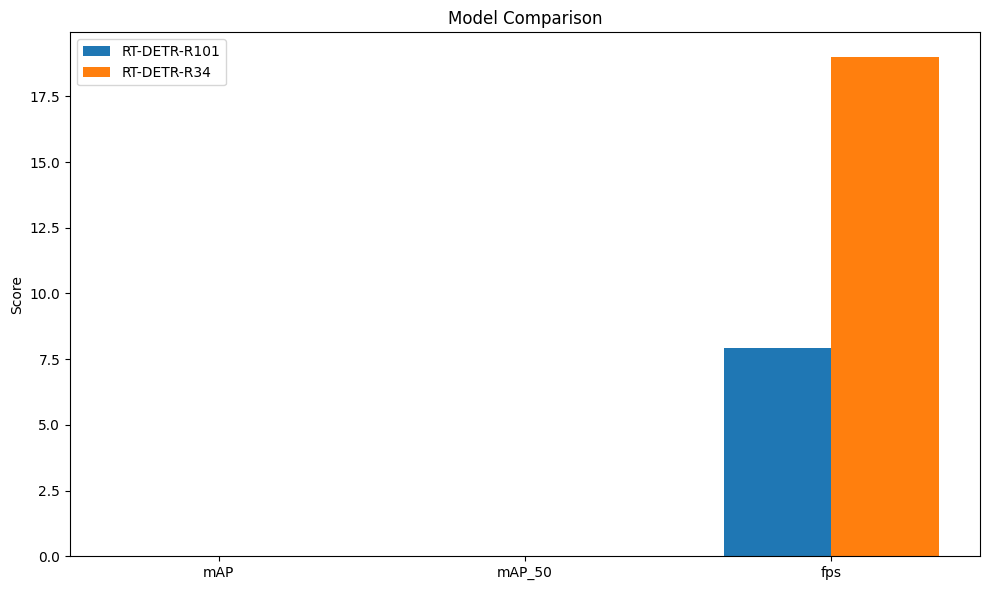

In [23]:
# %% INSTALL DEPENDENCIES
!pip install -q transformers timm torchmetrics[detection] opencv-python pycocotools matplotlib
!pip install -q "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"

# %% IMPORT LIBRARIES
import torch
import numpy as np
from PIL import Image
import requests
from transformers import RTDetrImageProcessor, RTDetrForObjectDetection
from torchmetrics.detection import MeanAveragePrecision
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import time
import matplotlib.pyplot as plt
import cv2
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# %% LOAD MODELS AND PROCESSORS
# Model URLs from Hugging Face Hub
model_r101 = "PekingU/rtdetr_v2_r101vd"
model_r34 = "PekingU/rtdetr_v2_r34vd"

# Load processors and models
processor_r101 = RTDetrImageProcessor.from_pretrained(model_r101)
model_r101 = RTDetrForObjectDetection.from_pretrained(model_r101).to(device).eval()

processor_r34 = RTDetrImageProcessor.from_pretrained(model_r34)
model_r34 = RTDetrForObjectDetection.from_pretrained(model_r34).to(device).eval()

print("Models and processors loaded successfully")

# %% LOAD COCO VALIDATION DATASET
# Create data directory
os.makedirs('data/annotations', exist_ok=True)

# Download annotations if not exists
if not os.path.exists('data/annotations/instances_val2017.json'):
    !wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
    !unzip -q annotations_trainval2017.zip -d data/
    !rm annotations_trainval2017.zip

# Initialize COCO API
coco_gt = COCO('data/annotations/instances_val2017.json')
image_ids = coco_gt.getImgIds()[:100]  # Use first 100 images for quick benchmark
print(f"Loaded COCO validation set with {len(image_ids)} images")

# %% DEFINE UTILITY FUNCTIONS
def load_image(image_id):
    """Load image from COCO dataset"""
    img_meta = coco_gt.loadImgs(image_id)[0]
    img_url = f"http://images.cocodataset.org/val2017/{img_meta['file_name']}"
    return Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

def convert_to_coco_format(predictions, image_id, orig_size):
    """Convert model outputs to COCO evaluation format"""
    results = []
    target_sizes = torch.tensor([orig_size[::-1]])  # (height, width) -> (width, height)

    # Process outputs with target sizes
    processed_outputs = processor_r101.post_process_object_detection(
        predictions, threshold=0, target_sizes=target_sizes
    )[0]

    for score, label, box in zip(
        processed_outputs["scores"],
        processed_outputs["labels"],
        processed_outputs["boxes"]
    ):
        # Convert to [x_min, y_min, width, height] format
        x_min, y_min, x_max, y_max = box.tolist()
        width = x_max - x_min
        height = y_max - y_min

        results.append({
            "image_id": image_id,
            "category_id": label.item(),
            "bbox": [round(x_min, 2), round(y_min, 2), round(width, 2), round(height, 2)],
            "score": round(score.item(), 3)
        })
    return results

# %% EVALUATION FUNCTION
def evaluate_model(model, processor, image_ids, warmup=5):
    """Evaluate model on COCO dataset and measure inference speed"""
    results = []
    latency = []

    # Warm-up
    for _ in range(warmup):
        dummy_input = torch.randn(3, 640, 640).unsqueeze(0).to(device)
        with torch.no_grad():
            _ = model(dummy_input)

    # Inference loop
    for img_id in image_ids:
        image = load_image(img_id)
        orig_size = image.size[::-1]  # (width, height) -> (height, width)
        inputs = processor(images=image, return_tensors="pt").to(device)

        start_time = time.time()
        with torch.no_grad():
            outputs = model(**inputs)
        latency.append(time.time() - start_time)

        results.extend(convert_to_coco_format(outputs, img_id, orig_size))

    # Calculate metrics
    coco_dt = coco_gt.loadRes(results)
    coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
    coco_eval.params.imgIds = image_ids
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    # Calculate speed metrics
    avg_latency = np.mean(latency) * 1000  # ms
    fps = 1 / np.mean(latency)

    return {
        "mAP_50": coco_eval.stats[1],
        "mAP": coco_eval.stats[0],
        "avg_latency_ms": avg_latency,
        "fps": fps
    }

# %% RUN EVALUATION
print("Evaluating RT-DETR-R101...")
results_r101 = evaluate_model(model_r101, processor_r101, image_ids)

print("\nEvaluating RT-DETR-R34...")
results_r34 = evaluate_model(model_r34, processor_r34, image_ids)

# %% RESULTS COMPARISON
print("\n" + "="*50)
print("RT-DETR-R101 Results:")
print(f"- mAP: {results_r101['mAP']:.4f}")
print(f"- mAP@50: {results_r101['mAP_50']:.4f}")
print(f"- Avg Latency: {results_r101['avg_latency_ms']:.2f} ms")
print(f"- FPS: {results_r101['fps']:.2f}")

print("\nRT-DETR-R34 Results:")
print(f"- mAP: {results_r34['mAP']:.4f}")
print(f"- mAP@50: {results_r34['mAP_50']:.4f}")
print(f"- Avg Latency: {results_r34['avg_latency_ms']:.2f} ms")
print(f"- FPS: {results_r34['fps']:.2f}")

# %% VISUALIZATION
def visualize_comparison(results_r101, results_r34):
    metrics = ['mAP', 'mAP_50', 'fps']
    r101_values = [results_r101['mAP'], results_r101['mAP_50'], results_r101['fps']]
    r34_values = [results_r34['mAP'], results_r34['mAP_50'], results_r34['fps']]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, r101_values, width, label='RT-DETR-R101')
    rects2 = ax.bar(x + width/2, r34_values, width, label='RT-DETR-R34')

    ax.set_ylabel('Score')
    ax.set_title('Model Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    fig.tight_layout()
    plt.savefig('comparison.png')
    plt.show()

visualize_comparison(results_r101, results_r34)

# %%